# Configuring pandas

In [144]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
#pd.set_option('display.notebook_repr_html', False)
#pd.set_option('display.max_columns', 7)
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Obtaining and organizing stock data from Google Finance

In [145]:
# import data reader package
import pandas_datareader as pdr

# read data from Yahoo! Finance for a specific 
# stock specified by ticker and between the start and end dates
def get_stock_data(ticker, start, end):
    # read the data
    data = pdr.data.DataReader(ticker, 'yahoo', start, end) #'google'

    # rename this column
    data.insert(0, "Ticker", ticker)
    return data

In [146]:
# request the three years of data for MSFT
start = datetime(2020, 1, 1)
end = datetime(2021, 2, 17)
get_stock_data("MSFT", start, end)[:5]

           Ticker        High         Low        Open  \
Date                                                    
2020-01-02   MSFT  160.729996  158.330002  158.779999   
2020-01-03   MSFT  159.949997  158.059998  158.320007   
2020-01-06   MSFT  159.100006  156.509995  157.080002   
2020-01-07   MSFT  159.669998  157.320007  159.320007   
2020-01-08   MSFT  160.800003  157.949997  158.929993   

                 Close      Volume   Adj Close  
Date                                            
2020-01-02  160.619995  22622100.0  158.936279  
2020-01-03  158.619995  21116200.0  156.957260  
2020-01-06  159.029999  20813700.0  157.362961  
2020-01-07  157.580002  21634100.0  155.928177  
2020-01-08  160.089996  27746500.0  158.411835  

In [147]:
get_stock_data("MSFT", start, end)

           Ticker        High         Low        Open  \
Date                                                    
2020-01-02   MSFT  160.729996  158.330002  158.779999   
2020-01-03   MSFT  159.949997  158.059998  158.320007   
2020-01-06   MSFT  159.100006  156.509995  157.080002   
2020-01-07   MSFT  159.669998  157.320007  159.320007   
2020-01-08   MSFT  160.800003  157.949997  158.929993   
...           ...         ...         ...         ...   
2021-02-09   MSFT  244.759995  241.380005  241.869995   
2021-02-10   MSFT  245.919998  240.889999  245.000000   
2021-02-11   MSFT  245.149994  242.149994  244.779999   
2021-02-12   MSFT  245.300003  242.729996  243.929993   
2021-02-16   MSFT  246.130005  242.919998  245.029999   

                 Close      Volume   Adj Close  
Date                                            
2020-01-02  160.619995  22622100.0  158.936279  
2020-01-03  158.619995  21116200.0  156.957260  
2020-01-06  159.029999  20813700.0  157.362961  
2020-01-07  1

In [148]:
# gets data for multiple stocks
# tickers: a list of stock symbols to fetch
# start and end are the start end end dates
def get_data_for_multiple_stocks(tickers, start, end):
    # we return a dictionary
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        # get the data for the specific ticker
        s = get_stock_data(ticker, start, end)
        # add it to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

In [149]:
# get the data for all the stocks that we want
raw = get_data_for_multiple_stocks(
    ["MSFT", "AAPL", "GE", "IBM", "AA", "DAL", "UAL", "PEP", "KO"],
    start, end)

In [150]:
# take a peek at the data for MSFT
raw['MSFT'][:5]

           Ticker        High         Low        Open  \
Date                                                    
2020-01-02   MSFT  160.729996  158.330002  158.779999   
2020-01-03   MSFT  159.949997  158.059998  158.320007   
2020-01-06   MSFT  159.100006  156.509995  157.080002   
2020-01-07   MSFT  159.669998  157.320007  159.320007   
2020-01-08   MSFT  160.800003  157.949997  158.929993   

                 Close      Volume   Adj Close  
Date                                            
2020-01-02  160.619995  22622100.0  158.936279  
2020-01-03  158.619995  21116200.0  156.957260  
2020-01-06  159.029999  20813700.0  157.362961  
2020-01-07  157.580002  21634100.0  155.928177  
2020-01-08  160.089996  27746500.0  158.411835  

In [151]:
# given the dictionary of data frames,
# pivots a given column into values with column
# names being the stock symbols
def pivot_tickers_to_columns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
    
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot("Date", "Ticker", column)

In [152]:
# do the pivot
close_px = pivot_tickers_to_columns(raw, "Close")
# peek at the result
close_px[:5]

Ticker             AA       AAPL        DAL  ...  \
Date                                         ...   
2020-01-02  21.420000  75.087502  59.040001  ...   
2020-01-03  21.500000  74.357498  58.060001  ...   
2020-01-06  21.000000  74.949997  57.660000  ...   
2020-01-07  21.320000  74.597504  57.610001  ...   
2020-01-08  20.459999  75.797501  58.849998  ...   

Ticker            MSFT         PEP        UAL  
Date                                           
2020-01-02  160.619995  135.820007  89.739998  
2020-01-03  158.619995  135.630005  87.900002  
2020-01-06  159.029999  136.149994  87.699997  
2020-01-07  157.580002  134.009995  86.769997  
2020-01-08  160.089996  134.699997  87.300003  

[5 rows x 9 columns]

In [153]:
print(close_px.iloc[1:5,1:5])

Ticker           AAPL        DAL     GE         IBM
Date                                               
2020-01-03  74.357498  58.060001  11.97  134.339996
2020-01-06  74.949997  57.660000  12.14  134.100006
2020-01-07  74.597504  57.610001  12.05  134.190002
2020-01-08  75.797501  58.849998  11.94  135.309998


# Plotting time-series prices

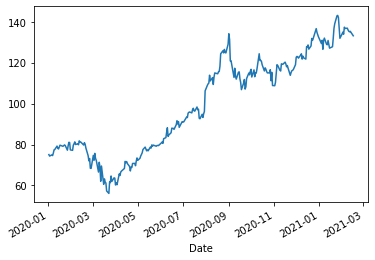

In [154]:
# plot the closing prices of AAPL
close_px['AAPL'].plot();

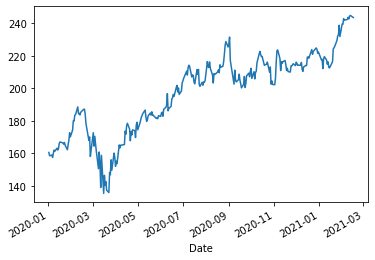

In [155]:
# plot the closing prices of MSFT
close_px['MSFT'].plot();

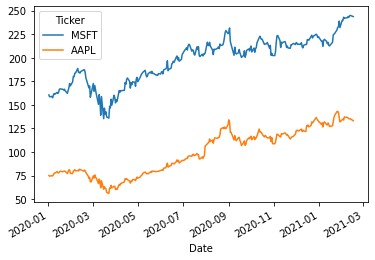

In [156]:
# plot MSFT vs AAPL on the same chart
close_px[['MSFT', 'AAPL']].plot();

# Plotting volume series data

In [157]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker             AA        AAPL         DAL  ...  \
Date                                           ...   
2021-02-09  5591000.0  76774200.0  10432100.0  ...   
2021-02-10  5196600.0  73046600.0  12011100.0  ...   
2021-02-11  3863100.0  64154400.0   8537500.0  ...   
2021-02-12  3304600.0  60029300.0  11472800.0  ...   
2021-02-16  4256300.0  80206200.0  13746500.0  ...   

Ticker            MSFT        PEP         UAL  
Date                                           
2021-02-09  23565000.0  3179300.0  11967200.0  
2021-02-10  22186700.0  6966600.0   9772500.0  
2021-02-11  15742200.0  7519100.0   8465500.0  
2021-02-12  16552000.0  5657500.0   8973700.0  
2021-02-16  26708200.0  5178800.0  13923000.0  

[5 rows x 9 columns]

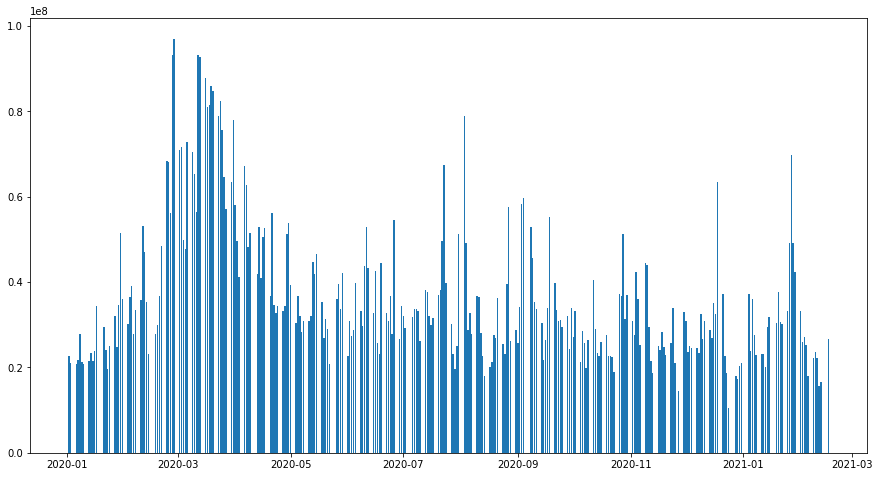

In [158]:
# plot the volume for MSFT
msft_volume = volumes[["MSFT"]]
plt.bar(msft_volume.index, msft_volume["MSFT"])
plt.gcf().set_size_inches(15,8)

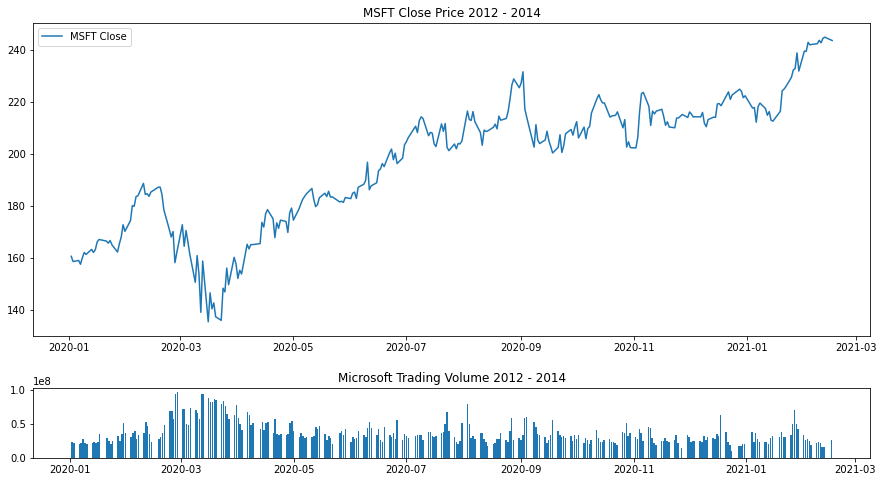

In [159]:
# draw the price history on the top
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['MSFT'].index, close_px['MSFT'], 
         label='MSFT Close')
plt.title('MSFT Close Price 2012 - 2014')
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msft_volume.index, msft_volume['MSFT'])
plt.title('Microsoft Trading Volume 2012 - 2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

# Calculating simple daily percentage change

In [160]:
# calculate daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2020-01-02       NaN       NaN       NaN  ...       NaN   
2020-01-03  0.003735 -0.009722 -0.016599  ... -0.012452   
2020-01-06 -0.023256  0.007968 -0.006889  ...  0.002585   
2020-01-07  0.015238 -0.004703 -0.000867  ... -0.009118   
2020-01-08 -0.040338  0.016086  0.021524  ...  0.015928   

Ticker           PEP       UAL  
Date                            
2020-01-02       NaN       NaN  
2020-01-03 -0.001399 -0.020504  
2020-01-06  0.003834 -0.002275  
2020-01-07 -0.015718 -0.010604  
2020-01-08  0.005149  0.006108  

[5 rows x 9 columns]

In [161]:
# check the percentage on 2012-01-05
close_px.loc['2020-01-03']['AAPL'] / \
    close_px.loc['2020-01-02']['AAPL'] -1

-0.00972203551987938

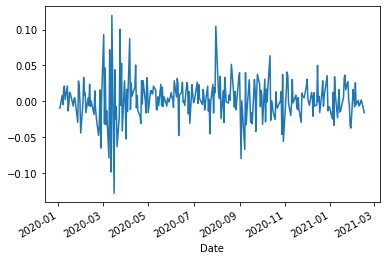

In [162]:
# plot daily percentage change for AAPL
daily_pc["AAPL"].plot();

# Calculating simple daily cumulative returns

In [163]:
# calculate daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2020-01-02       NaN       NaN       NaN  ...       NaN   
2020-01-03  1.003735  0.990278  0.983401  ...  0.987548   
2020-01-06  0.980392  0.998169  0.976626  ...  0.990101   
2020-01-07  0.995331  0.993474  0.975779  ...  0.981073   
2020-01-08  0.955182  1.009456  0.996782  ...  0.996700   

Ticker           PEP       UAL  
Date                            
2020-01-02       NaN       NaN  
2020-01-03  0.998601  0.979496  
2020-01-06  1.002430  0.977268  
2020-01-07  0.986673  0.966904  
2020-01-08  0.991754  0.972810  

[5 rows x 9 columns]

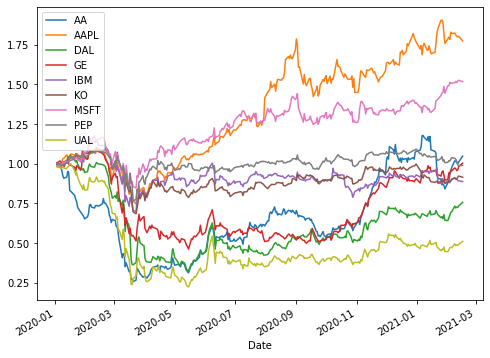

In [164]:
# plot all the cumulative returns to get an idea 
# of the relative performance of all the stocks
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2);

# Resampling data from daily to monthly returns

In [165]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

Ticker         AA       AAPL        DAL  ...        MSFT  \
Date                                     ...               
2020-01-31  13.95  77.377502  55.740002  ...  170.229996   
2020-02-29  13.95  77.377502  55.740002  ...  170.229996   
2020-03-31   6.16  63.572498  28.530001  ...  157.710007   
2020-04-30   8.15  73.449997  25.910000  ...  179.210007   
2020-05-31   8.15  73.449997  25.910000  ...  179.210007   

Ticker             PEP        UAL  
Date                               
2020-01-31  142.020004  74.800003  
2020-02-29  142.020004  74.800003  
2020-03-31  120.099998  31.549999  
2020-04-30  132.289993  29.580000  
2020-05-31  132.289993  29.580000  

[5 rows x 9 columns]

In [166]:
# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2020-01-31       NaN       NaN       NaN  ...       NaN   
2020-02-29  0.000000  0.000000  0.000000  ...  0.000000   
2020-03-31 -0.558423 -0.178411 -0.488159  ... -0.073547   
2020-04-30  0.323052  0.155374 -0.091833  ...  0.136326   
2020-05-31  0.000000  0.000000  0.000000  ...  0.000000   

Ticker           PEP       UAL  
Date                            
2020-01-31       NaN       NaN  
2020-02-29  0.000000  0.000000  
2020-03-31 -0.154344 -0.578209  
2020-04-30  0.101499 -0.062441  
2020-05-31  0.000000  0.000000  

[5 rows x 9 columns]

In [167]:
# calculate monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2020-01-31       NaN       NaN       NaN  ...       NaN   
2020-02-29  1.000000  1.000000  1.000000  ...  1.000000   
2020-03-31  0.441577  0.821589  0.511841  ...  0.926453   
2020-04-30  0.584229  0.949242  0.464837  ...  1.052752   
2020-05-31  0.584229  0.949242  0.464837  ...  1.052752   

Ticker           PEP       UAL  
Date                            
2020-01-31       NaN       NaN  
2020-02-29  1.000000  1.000000  
2020-03-31  0.845656  0.421791  
2020-04-30  0.931488  0.395455  
2020-05-31  0.931488  0.395455  

[5 rows x 9 columns]

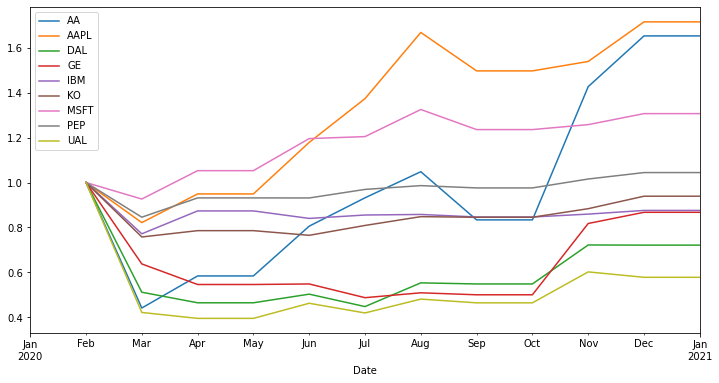

In [168]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2);

# Analyzing distribution of returns

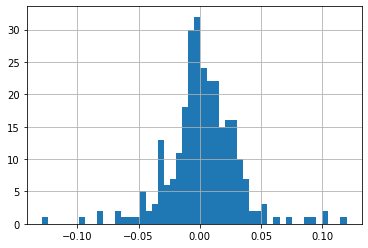

In [169]:
# histogram of the daily percentage change for AAPL
aapl = daily_pc['AAPL']
aapl.hist(bins=50);

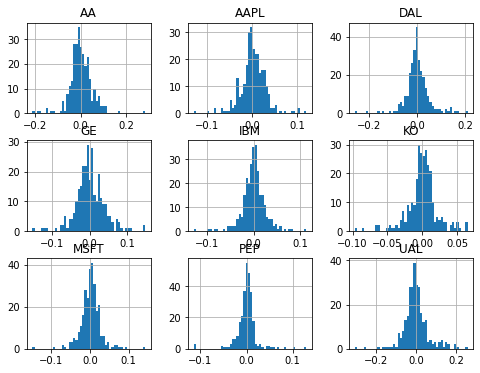

In [170]:
# matrix of all stocks daily % changes histograms
daily_pc.hist(bins=50, figsize=(8,6));

# Performing moving average calculation

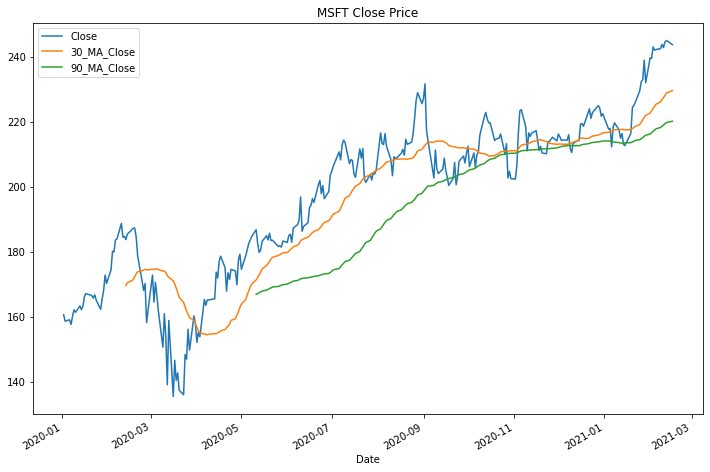

In [171]:
# extract just MSFT close
msft_close = close_px[['MSFT']]['MSFT']
# calculate the 30 and 90 day rolling means
ma_30 = msft_close.rolling(window=30).mean()
ma_90 = msft_close.rolling(window=90).mean()
# compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close': msft_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# plot all the series against each other
result.plot(title="MSFT Close Price")
plt.gcf().set_size_inches(12,8)

# Comparision of average daily returns across stocks

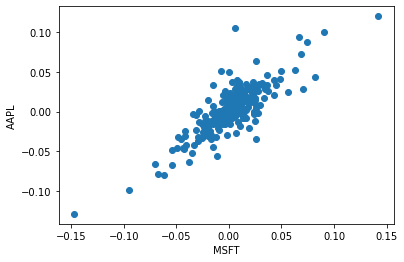

In [172]:
# plot the daily percentage change of MSFT vs AAPL
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL');

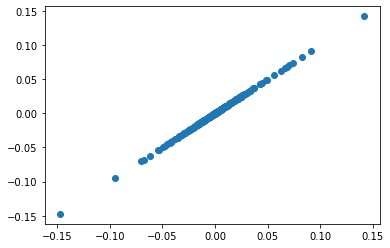

In [173]:
# demonstrate perfect correlation
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT']);

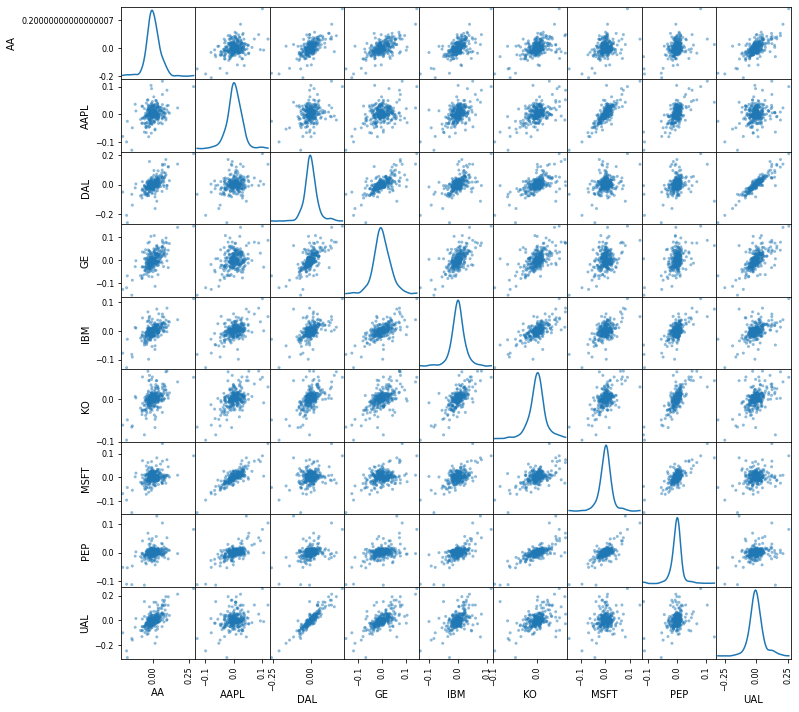

In [174]:
from pandas.plotting import scatter_matrix
# plot the scatter of daily price changed for ALL stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));

# Correlation of stocks based upon daily percentage change of closing price

In [175]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

Ticker        AA      AAPL       DAL  ...      MSFT  \
Ticker                                ...             
AA      1.000000  0.389628  0.654937  ...  0.395410   
AAPL    0.389628  1.000000  0.316363  ...  0.826651   
DAL     0.654937  0.316363  1.000000  ...  0.305697   
GE      0.638408  0.393968  0.679185  ...  0.428594   
IBM     0.599951  0.541946  0.553358  ...  0.603497   
KO      0.504830  0.545930  0.584071  ...  0.576623   
MSFT    0.395410  0.826651  0.305697  ...  1.000000   
PEP     0.427337  0.670453  0.347166  ...  0.736939   
UAL     0.686374  0.288916  0.926129  ...  0.281139   

Ticker       PEP       UAL  
Ticker                      
AA      0.427337  0.686374  
AAPL    0.670453  0.288916  
DAL     0.347166  0.926129  
GE      0.450966  0.667898  
IBM     0.683229  0.511778  
KO      0.756655  0.491698  
MSFT    0.736939  0.281139  
PEP     1.000000  0.265455  
UAL     0.265455  1.000000  

[9 rows x 9 columns]

In [176]:
print(corrs.iloc[2,:])

Ticker
AA      0.654937
AAPL    0.316363
DAL     1.000000
GE      0.679185
IBM     0.553358
KO      0.584071
MSFT    0.305697
PEP     0.347166
UAL     0.926129
Name: DAL, dtype: float64


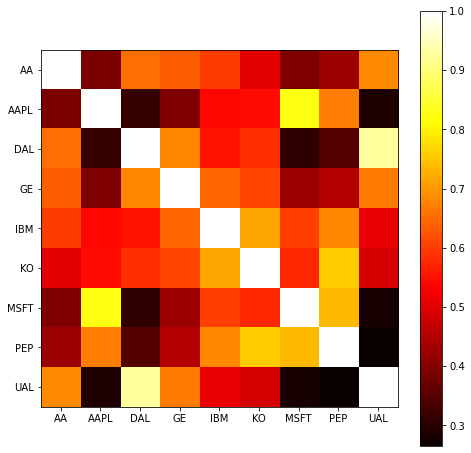

In [177]:
# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

# Volatility

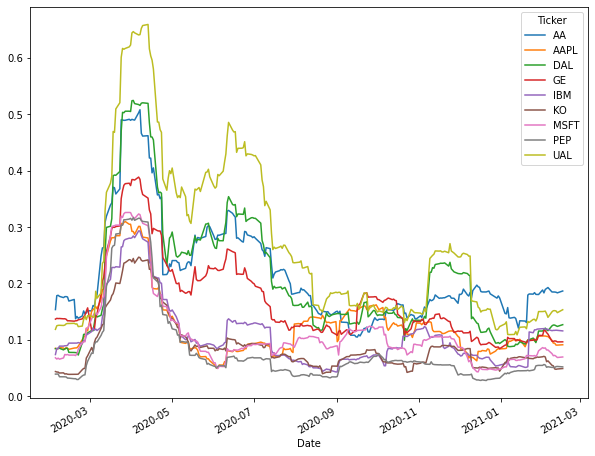

In [178]:
# 75 period minimum
min_periods = 22 #75
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot it
vol.plot(figsize=(10, 8));

# Determining risk relative to expected returns

(0.005, 0.07)

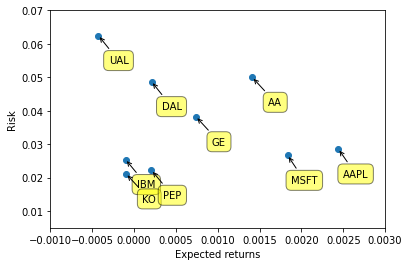

In [179]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))
# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.07)

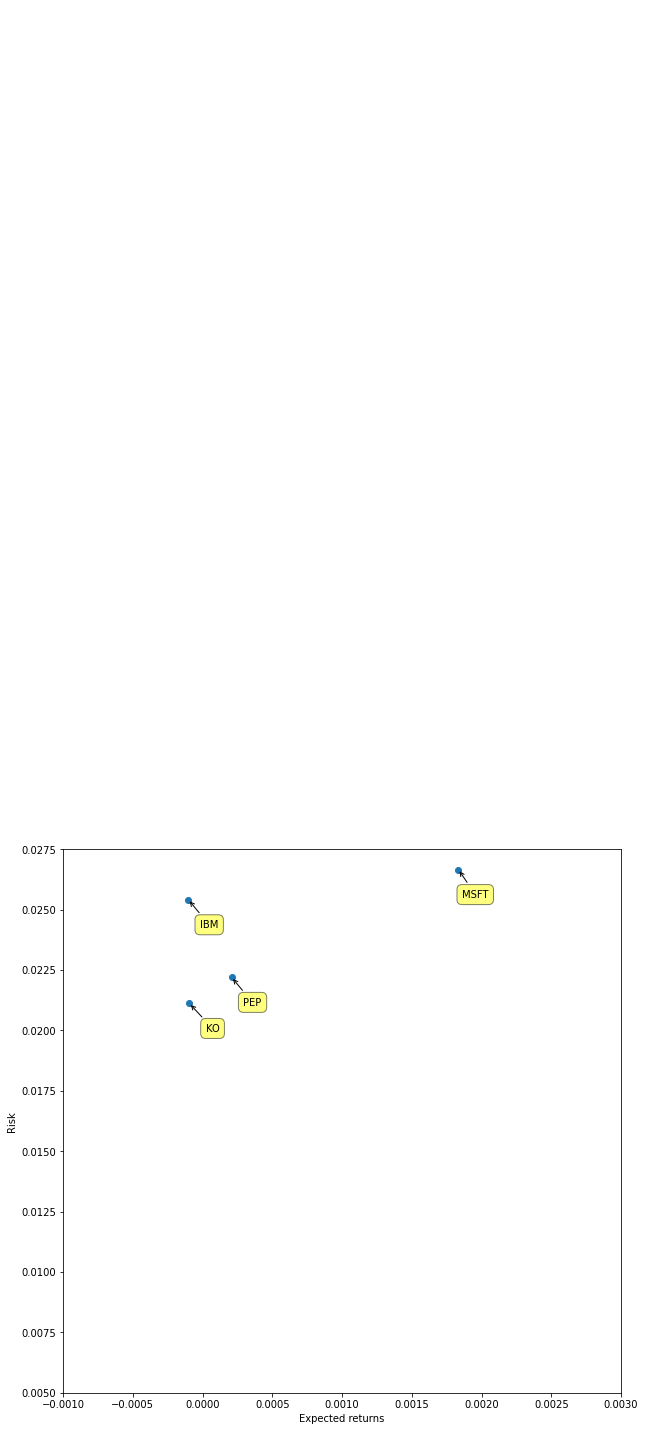

In [180]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

# set size
plt.gcf().set_size_inches(10,10) #(8,8)